In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt


In [2]:
df_turkey2013 = pd.read_excel('/Users/tativalentine/Desktop/FOOD/EDA/turkey2013.xlsx')
df_turkey2013.sample(5)

,Start Date,End Date,Product Name,British Columbia,Alberta,Saskatchewan,Manitoba,Remaining Ontario,Ontario,Remaining Quebec,Quebec,Maritimes,Newfoundland and Labrador,Canada
66,2013-01-13,2013-02-09,Ground turkey,11.65,12.84,12.61,11.76,11.16,11.42,10.22,10.91,11.58,10.93,11.70
19,2013-06-02,2013-06-29,Whole frozen turkey,4.32,4.96,4.03,6.50,5.70,5.85,5.33,5.30,4.56,4.53,4.76
38,2013-11-17,2013-12-14,Turkey breasts (tal),14.21,9.02,7.61,13.84,13.19,13.45,13.63,13.80,12.04,11.31,11.70
16,2013-03-10,2013-04-06,Whole frozen turkey,2.85,3.08,3.12,4.34,3.84,3.95,2.69,2.99,3.30,3.41,3.28
2,2013-02-10,2013-03-09,Whole fresh turkey,5.36,6.02,5.01,6.82,5.43,5.75,7.76,5.98,6.01,6.56,5.68


In [3]:
df_turkey2013['Start Date'] = pd.to_datetime(df_turkey2013['Start Date'])
df_turkey2013['End Date'] = pd.to_datetime(df_turkey2013['End Date'])

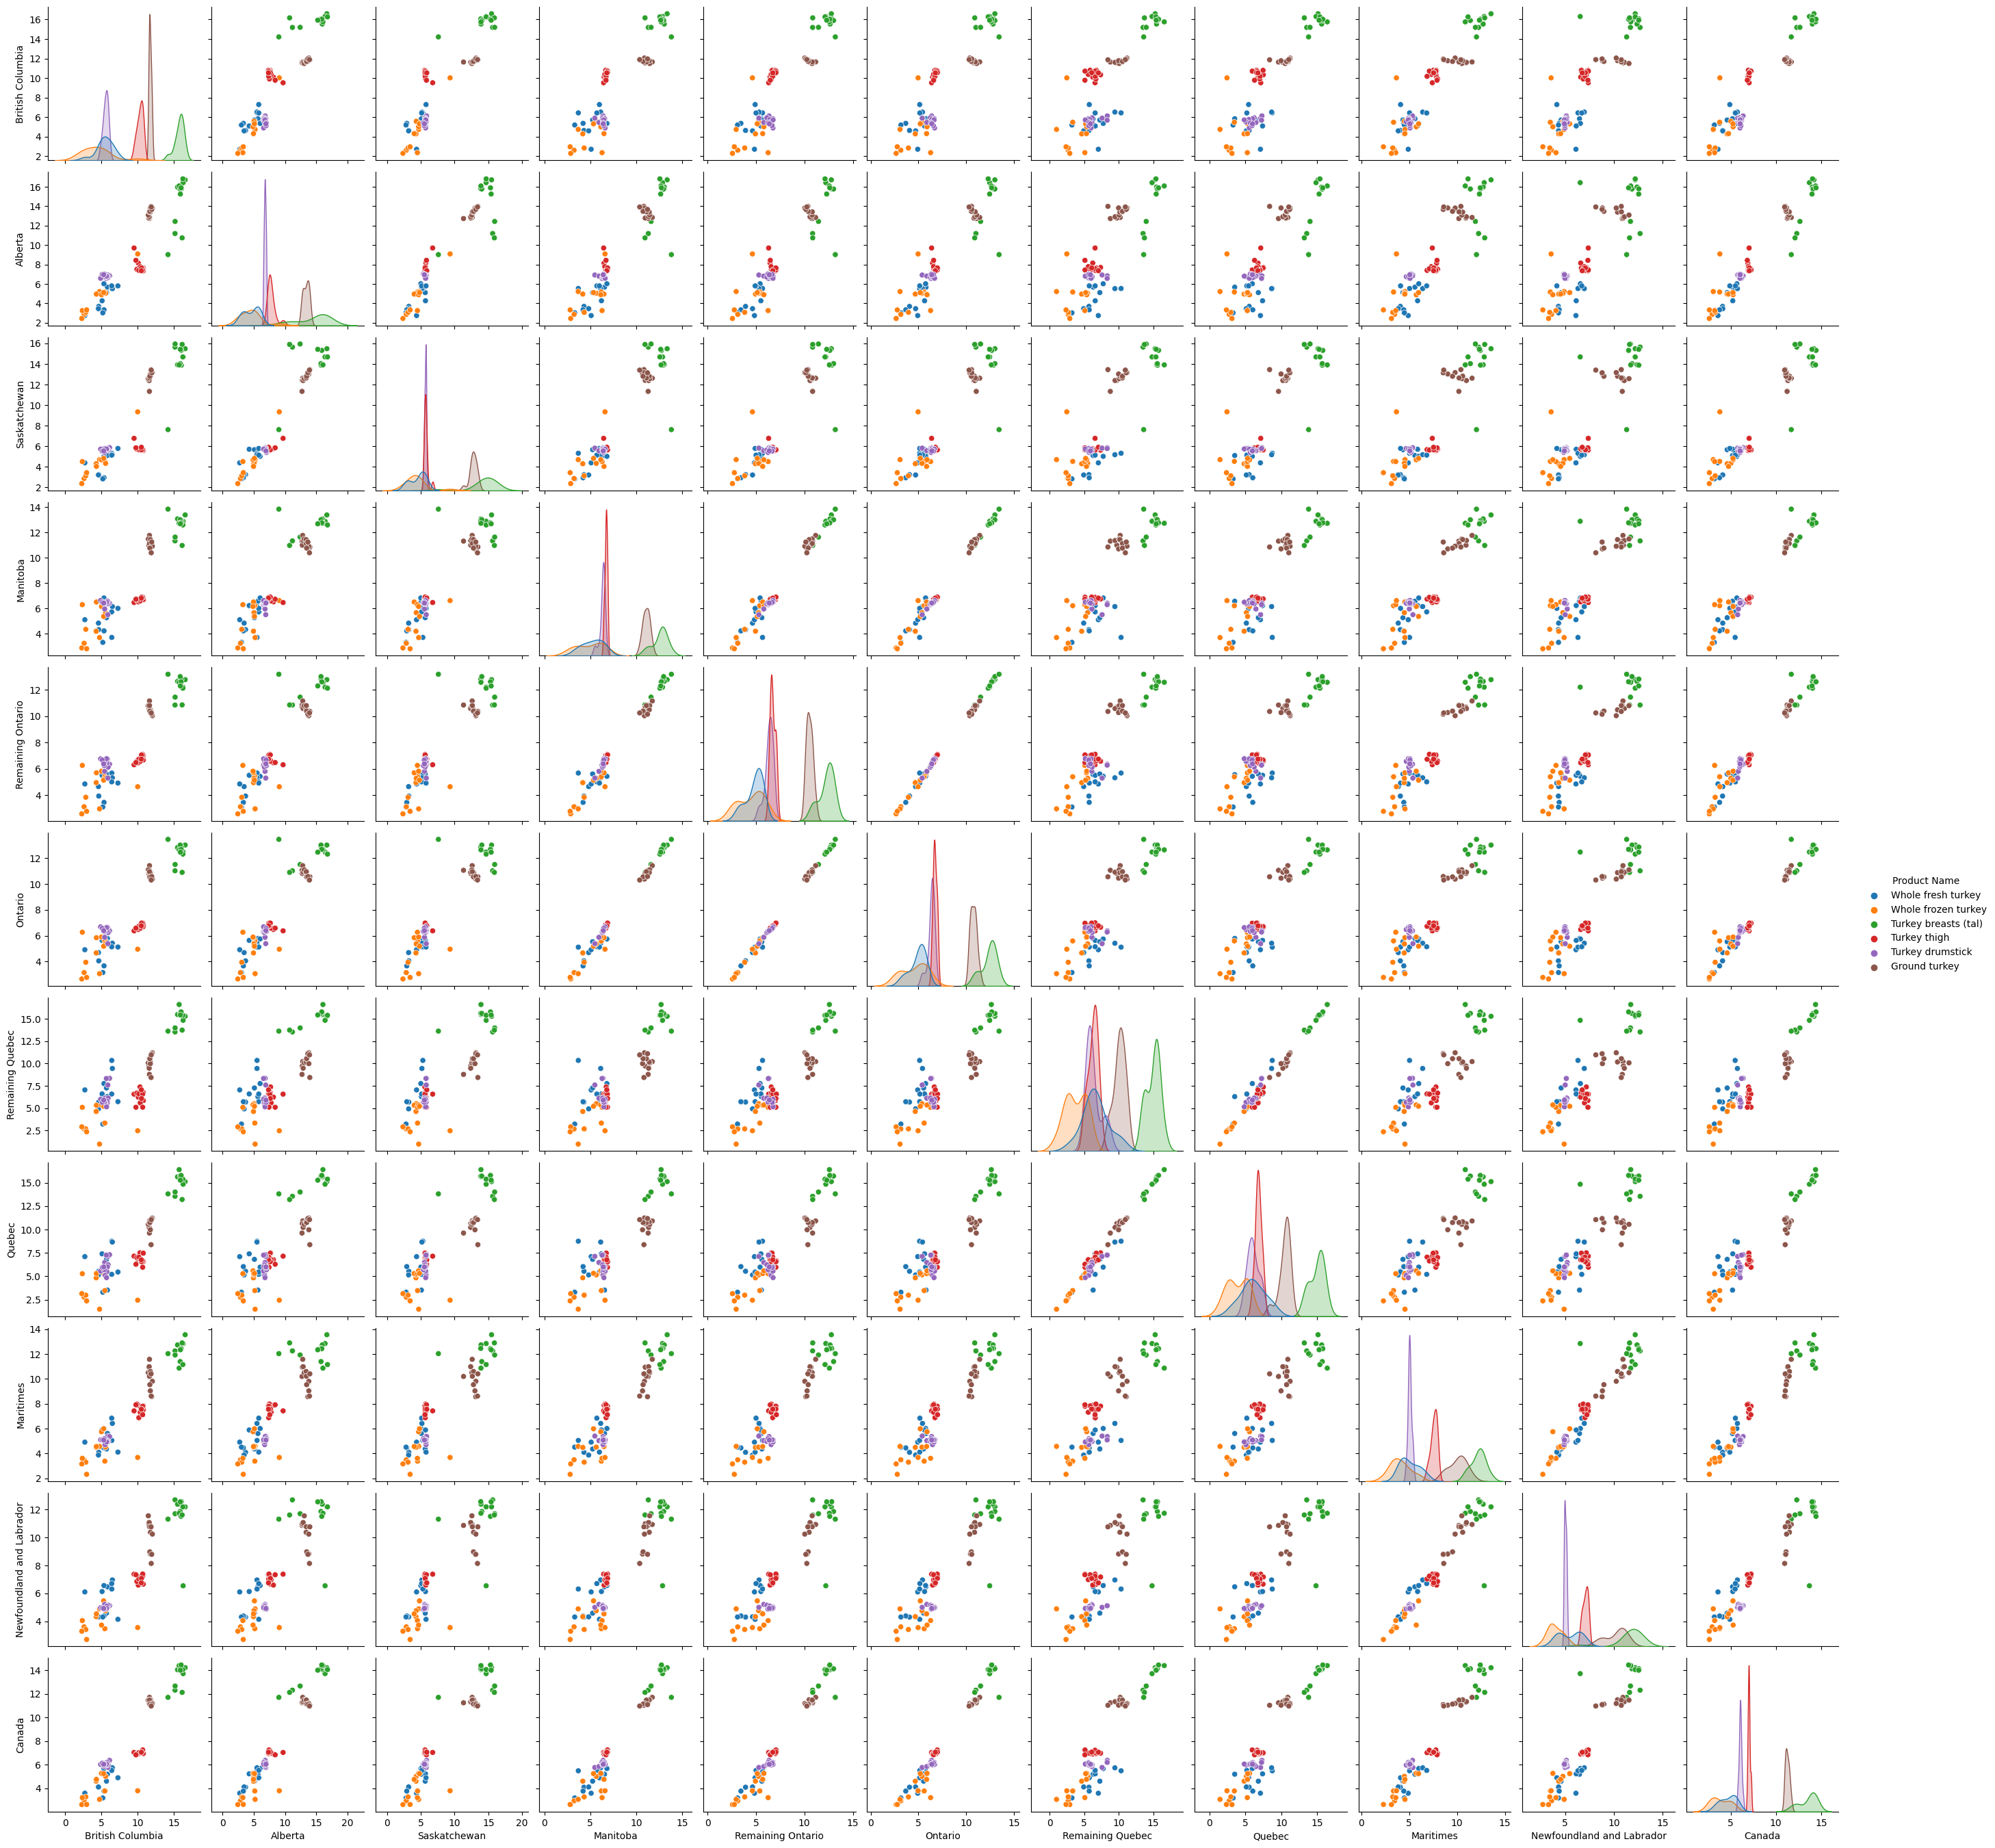

In [4]:
# Pairplot to visualize relationships between numerical variables
sns.pairplot(df_turkey2013, hue='Product Name')
plt.show()

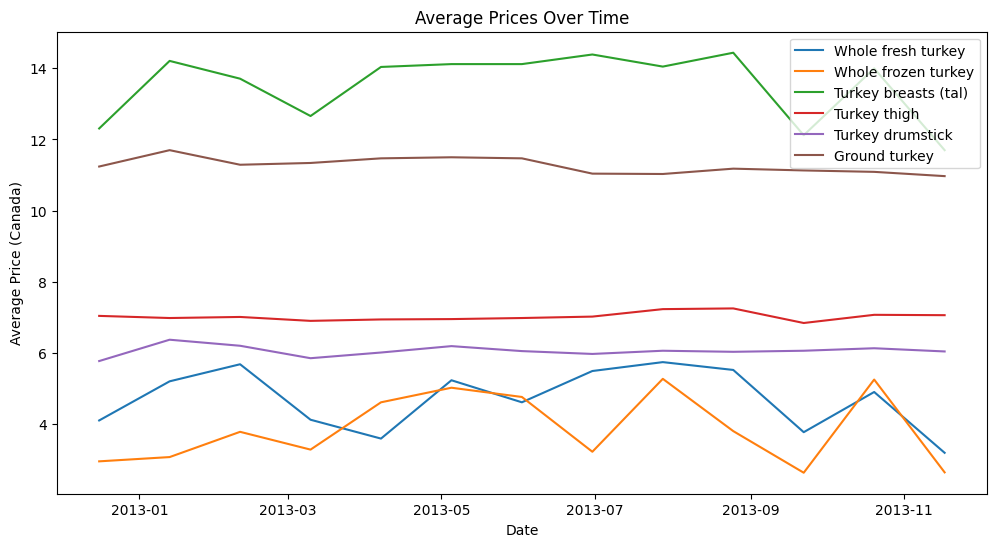

In [5]:
# Line plot to visualize average prices over time
plt.figure(figsize=(12, 6))
for product in df_turkey2013['Product Name'].unique():
    product_data = df_turkey2013[df_turkey2013['Product Name'] == product]
    plt.plot(product_data['Start Date'], product_data['Canada'], label=product)

plt.title('Average Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Average Price (Canada)')
plt.legend()
plt.show()

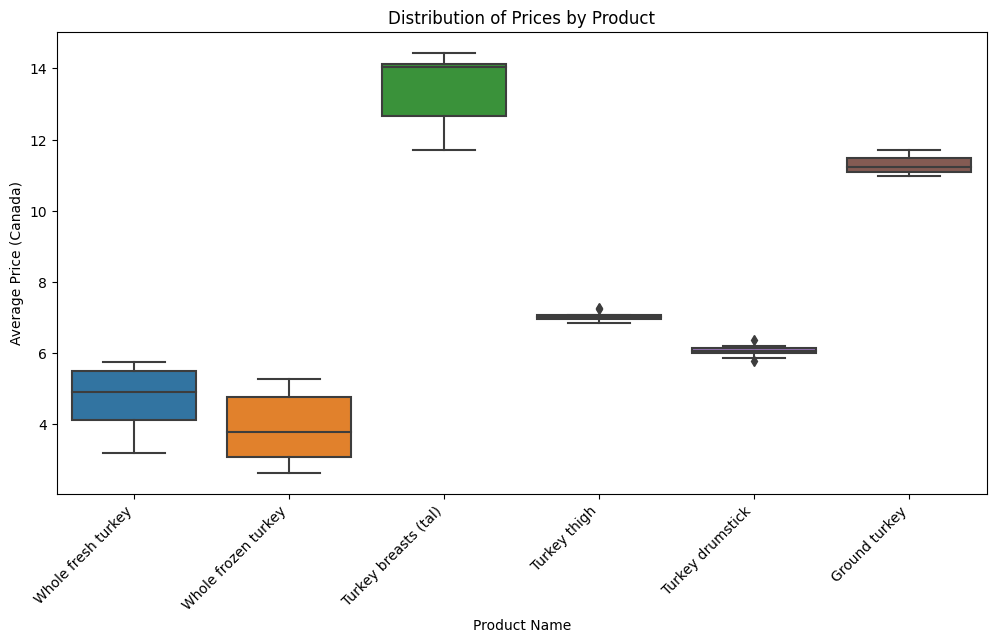

In [6]:
# Boxplot to visualize the distribution of prices by product
plt.figure(figsize=(12, 6))
sns.boxplot(x='Product Name', y='Canada', data=df_turkey2013)
plt.title('Distribution of Prices by Product')
plt.xlabel('Product Name')
plt.ylabel('Average Price (Canada)')
plt.xticks(rotation=45, ha='right')
plt.show()

/var/folders/nf/rr1y3sz51_d8gbgc735ltjtc0000gn/T/ipykernel_6803/4172060334.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_turkey2013.corr()


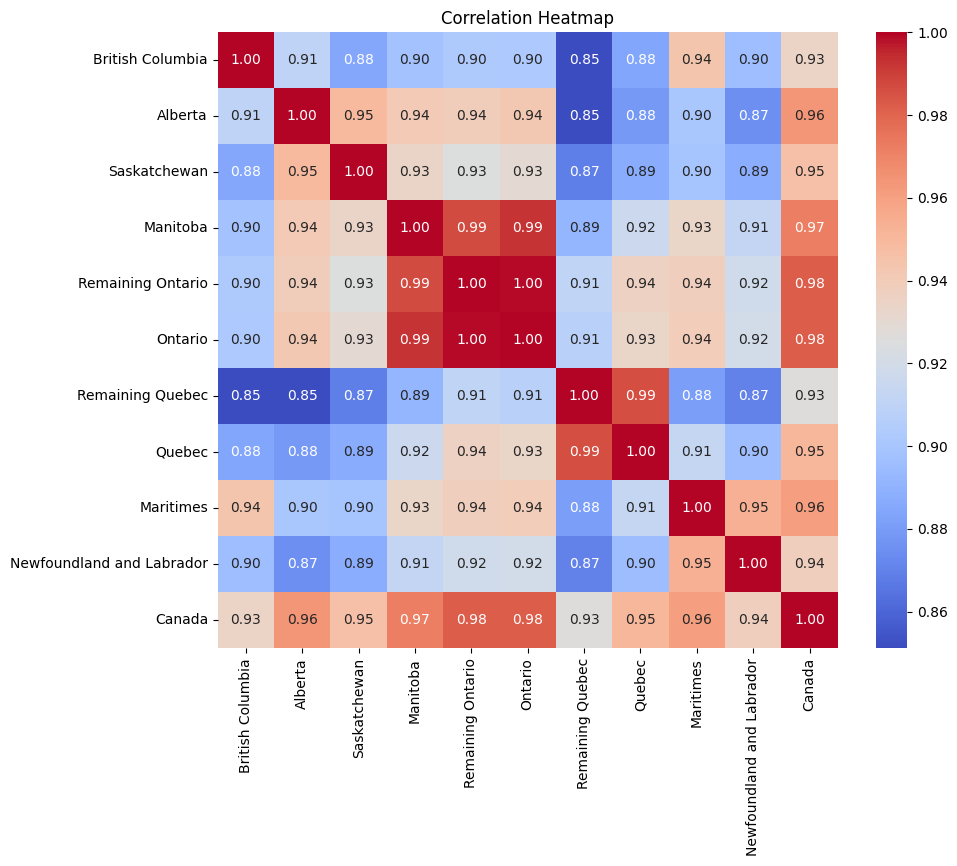

In [7]:
# Correlation heatmap to identify relationships between variables
correlation_matrix = df_turkey2013.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [8]:
# Specific Excel files
excel_files = ['Turkey2013.xlsx', 'Turkey2014.xlsx', 'Turkey2015.xlsx', 'Turkey2016.xlsx', 'Turkey2017.xlsx']

In [9]:
combined_data_turkey = pd.DataFrame()

In [10]:
import os

In [11]:
# Loop through each Excel file and concatenate its data to the combined_data DataFrame
for file in excel_files:
    file_path = os.path.join('/Users/tativalentine/Desktop/FOOD/EDA', file)
    df = pd.read_excel(file_path)  
    combined_data_turkey = pd.concat([combined_data_turkey, df], ignore_index=True)

In [12]:
# Save the combined data to a new Excel file
combined_data_turkey.to_excel('combined_data_turkey.xlsx', index=False)

In [13]:
print(combined_data_turkey.columns)

Index(['Start Date', 'End Date', 'Product Name', 'British Columbia', 'Alberta',
       'Saskatchewan', 'Manitoba', 'Remaining Ontario', 'Ontario',
       'Remaining Quebec', 'Quebec', 'Maritimes', 'Newfoundland and Labrador',
       'Canada', 'Montreal'],
      dtype='object')


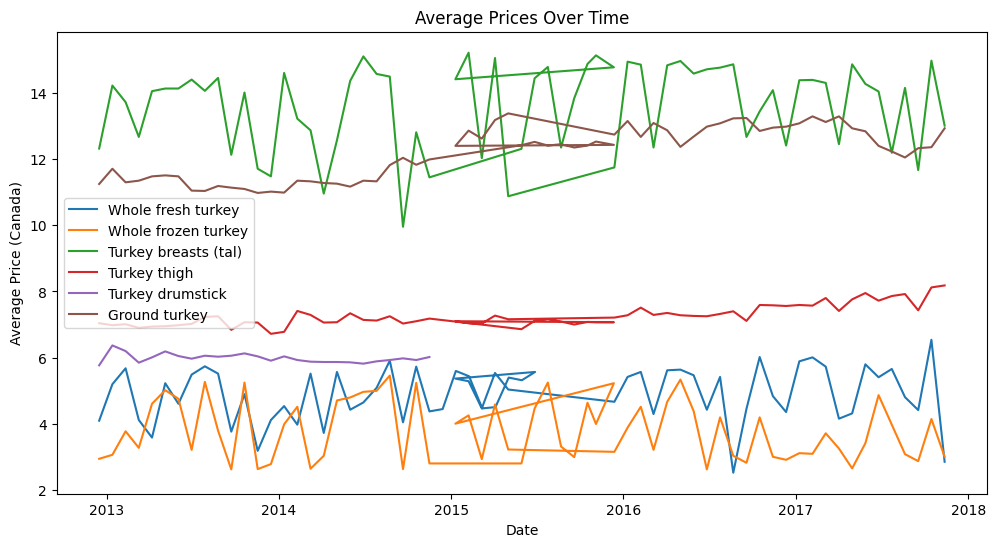

In [14]:
# Line plot to visualize average prices over time
plt.figure(figsize=(12, 6))
for product in combined_data_turkey['Product Name'].unique():
    product_data = combined_data_turkey[combined_data_turkey['Product Name'] == product]
    plt.plot(product_data['Start Date'], product_data['Canada'], label=product)

plt.title('Average Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Average Price (Canada)')
plt.legend()
plt.show()

In [15]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [19]:
# Select relevant columns
data_for_clustering = combined_data_turkey[['Start Date', 'Canada']]

In [20]:
# Standardize the data
scaler = StandardScaler()
data_for_clustering['Canada_scaled'] = scaler.fit_transform(data_for_clustering[['Canada']])

/var/folders/nf/rr1y3sz51_d8gbgc735ltjtc0000gn/T/ipykernel_6803/3300462920.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_for_clustering['Canada_scaled'] = scaler.fit_transform(data_for_clustering[['Canada']])


In [21]:
# Define the number of clusters
num_clusters = 3

In [22]:
# Fit the k-means model
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
data_for_clustering['Cluster'] = kmeans.fit_predict(data_for_clustering[['Canada_scaled']])

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/var/folders/nf/rr1y3sz51_d8gbgc735ltjtc0000gn/T/ipykernel_6803/3821243014.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_for_clustering['Cluster'] = kmeans.fit_predict(data_for_clustering[['Canada_scaled']])


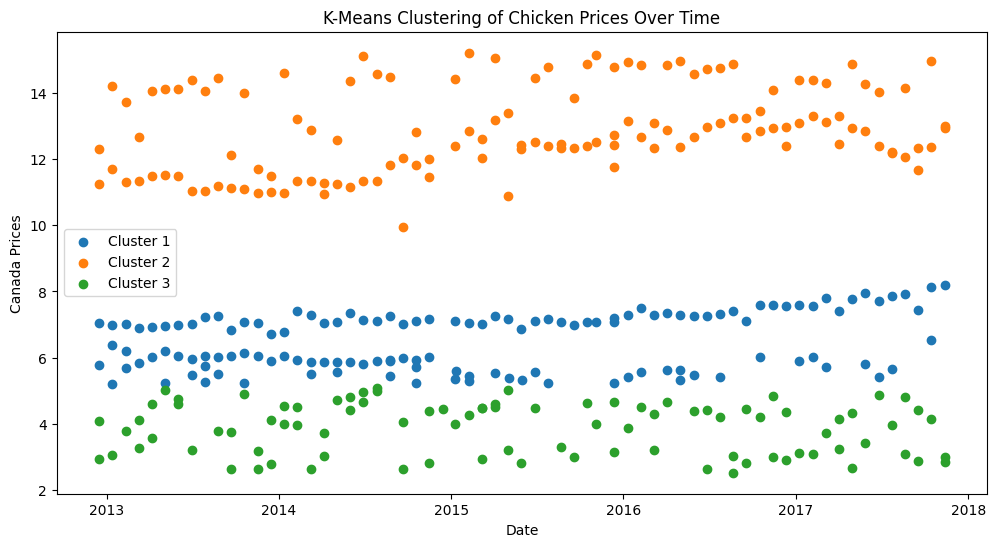

In [23]:
# Visualize the clusters
plt.figure(figsize=(12, 6))
for i in range(num_clusters):
    cluster_data = data_for_clustering[data_for_clustering['Cluster'] == i]
    plt.scatter(cluster_data['Start Date'], cluster_data['Canada'], label=f'Cluster {i + 1}')
    plt.title('K-Means Clustering of Chicken Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Canada Prices')
plt.legend()
plt.show()